# Formatting Data

In [48]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Format 2021-22 Salary Data from hoopshype
final_data = pd.DataFrame()

def add_data(dataframe, salary, base, advanced):
    # Get Salary
    salary = pd.read_html(salary)[0]
    salary.columns = ["Rank", "Player", "Salary", "Adjusted Salary"]
    salary = salary[["Player", "Adjusted Salary"]]
    
    # Get Base Stats table (Per Game)
    base_stats = pd.read_csv(base)
    base_stats["Player"] = base_stats["Player"].apply(lambda x: x.split('\\')[0])
    
    # Get Advanced Stats Table
    adv_stats = pd.read_csv(advanced)
    adv_stats["Player"] = adv_stats["Player"].apply(lambda x: x.split('\\')[0])
    adv_stats = adv_stats.drop(["Rk", "Pos", "Age", "Tm", "G", "MP", "Unnamed: 19", "Unnamed: 24"], axis=1)
    
    # Merge Tables
    all_data = pd.merge(base_stats, adv_stats, how="inner", on="Player") # Merge stats
    all_data = all_data.merge(salary, how="left", on="Player") # Merge Salaries
    all_data = all_data.drop(["Rk"], axis=1) # Remove Rk column
    
    # Find Average values per column to fill data, using a table with the avg values
    na_counts = all_data.isnull().sum().reset_index()
    na_counts.columns = ["attribute", "count"]
    averages = []
    for label in na_counts["attribute"].items():
        try:
            averages.append(all_data[label[1]].mean())
        except:
            averages.append("N/A")
    na_counts["avg"] = averages
    print(na_counts)
    
    # Fill null data with values
    for label in na_counts[na_counts['count'] !=0]["attribute"].items():
        # print(label[1], na_counts[na_counts['attribute'] == label[1]]['avg'].iloc[0])
        all_data[label[1]] = all_data[label[1]].fillna(na_counts[na_counts['attribute'] == label[1]]['avg'].iloc[0])
    
    # Remove rows with no salary
    all_data = all_data[all_data["Adjusted Salary"] != "N/A"]
    all_data["Adjusted Salary"] = all_data["Adjusted Salary"].replace('[\$,]', '', regex=True).astype(float)
    
    if dataframe is None:
        return all_data, na_counts
    else:
        return pd.concat([dataframe, all_data],ignore_index = True), test

final_data, null_values = add_data(None,"https://hoopshype.com/salaries/players/2021-2022/","nba2122.csv","nba2122-advanced.csv")
final_data
#final_data.to_csv("Check.csv")

          attribute  count        avg
0            Player      0        N/A
1               Pos      0        N/A
2               Age      0    25.7488
3                Tm      0        N/A
4                 G      0     43.038
5                GS      0    20.3306
6                MP      0    18.9154
7                FG      0    3.03702
8               FGA      0    6.72248
9               FG%      9    0.43845
10               3P      0   0.915537
11              3PA      0    2.68579
12              3P%     44   0.304706
13               2P      0    2.12298
14              2PA      0    4.03769
15              2P%     16   0.510805
16             eFG%      9   0.501861
17               FT      0    1.25421
18              FTA      0    1.63372
19              FT%     59   0.747626
20              ORB      0   0.825289
21              DRB      0    2.62215
22              TRB      0    3.44711
23              AST      0    1.86826
24              STL      0   0.606777
25          

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Adjusted Salary
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,18.5,0.4,2.1,2.5,0.070,-2.0,-0.6,-2.6,-0.2,2956915.0
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0,18619958.0
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,25.0,3.6,3.5,7.2,0.188,1.7,2.1,3.8,2.7,30649609.0
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,22.4,2.1,1.0,3.1,0.141,1.3,-0.6,0.7,0.7,2881021.0
5,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,...,24.1,-1.1,1.1,0.1,0.003,-1.8,-1.1,-2.9,-0.3,3556962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,0.518,...,17.4,0.9,1.3,2.2,0.126,0.1,2.1,2.2,0.9,15475579.0
601,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,34.4,9.0,1.0,10.0,0.181,7.1,-2.0,5.2,4.8,9080829.0
602,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,19.9,0.8,1.4,2.1,0.145,-1.4,0.4,-1.0,0.2,1623970.0
603,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,...,15.9,0.9,0.2,1.1,0.143,-1.2,-1.0,-2.2,0.0,2606136.0


## Determining Key Features

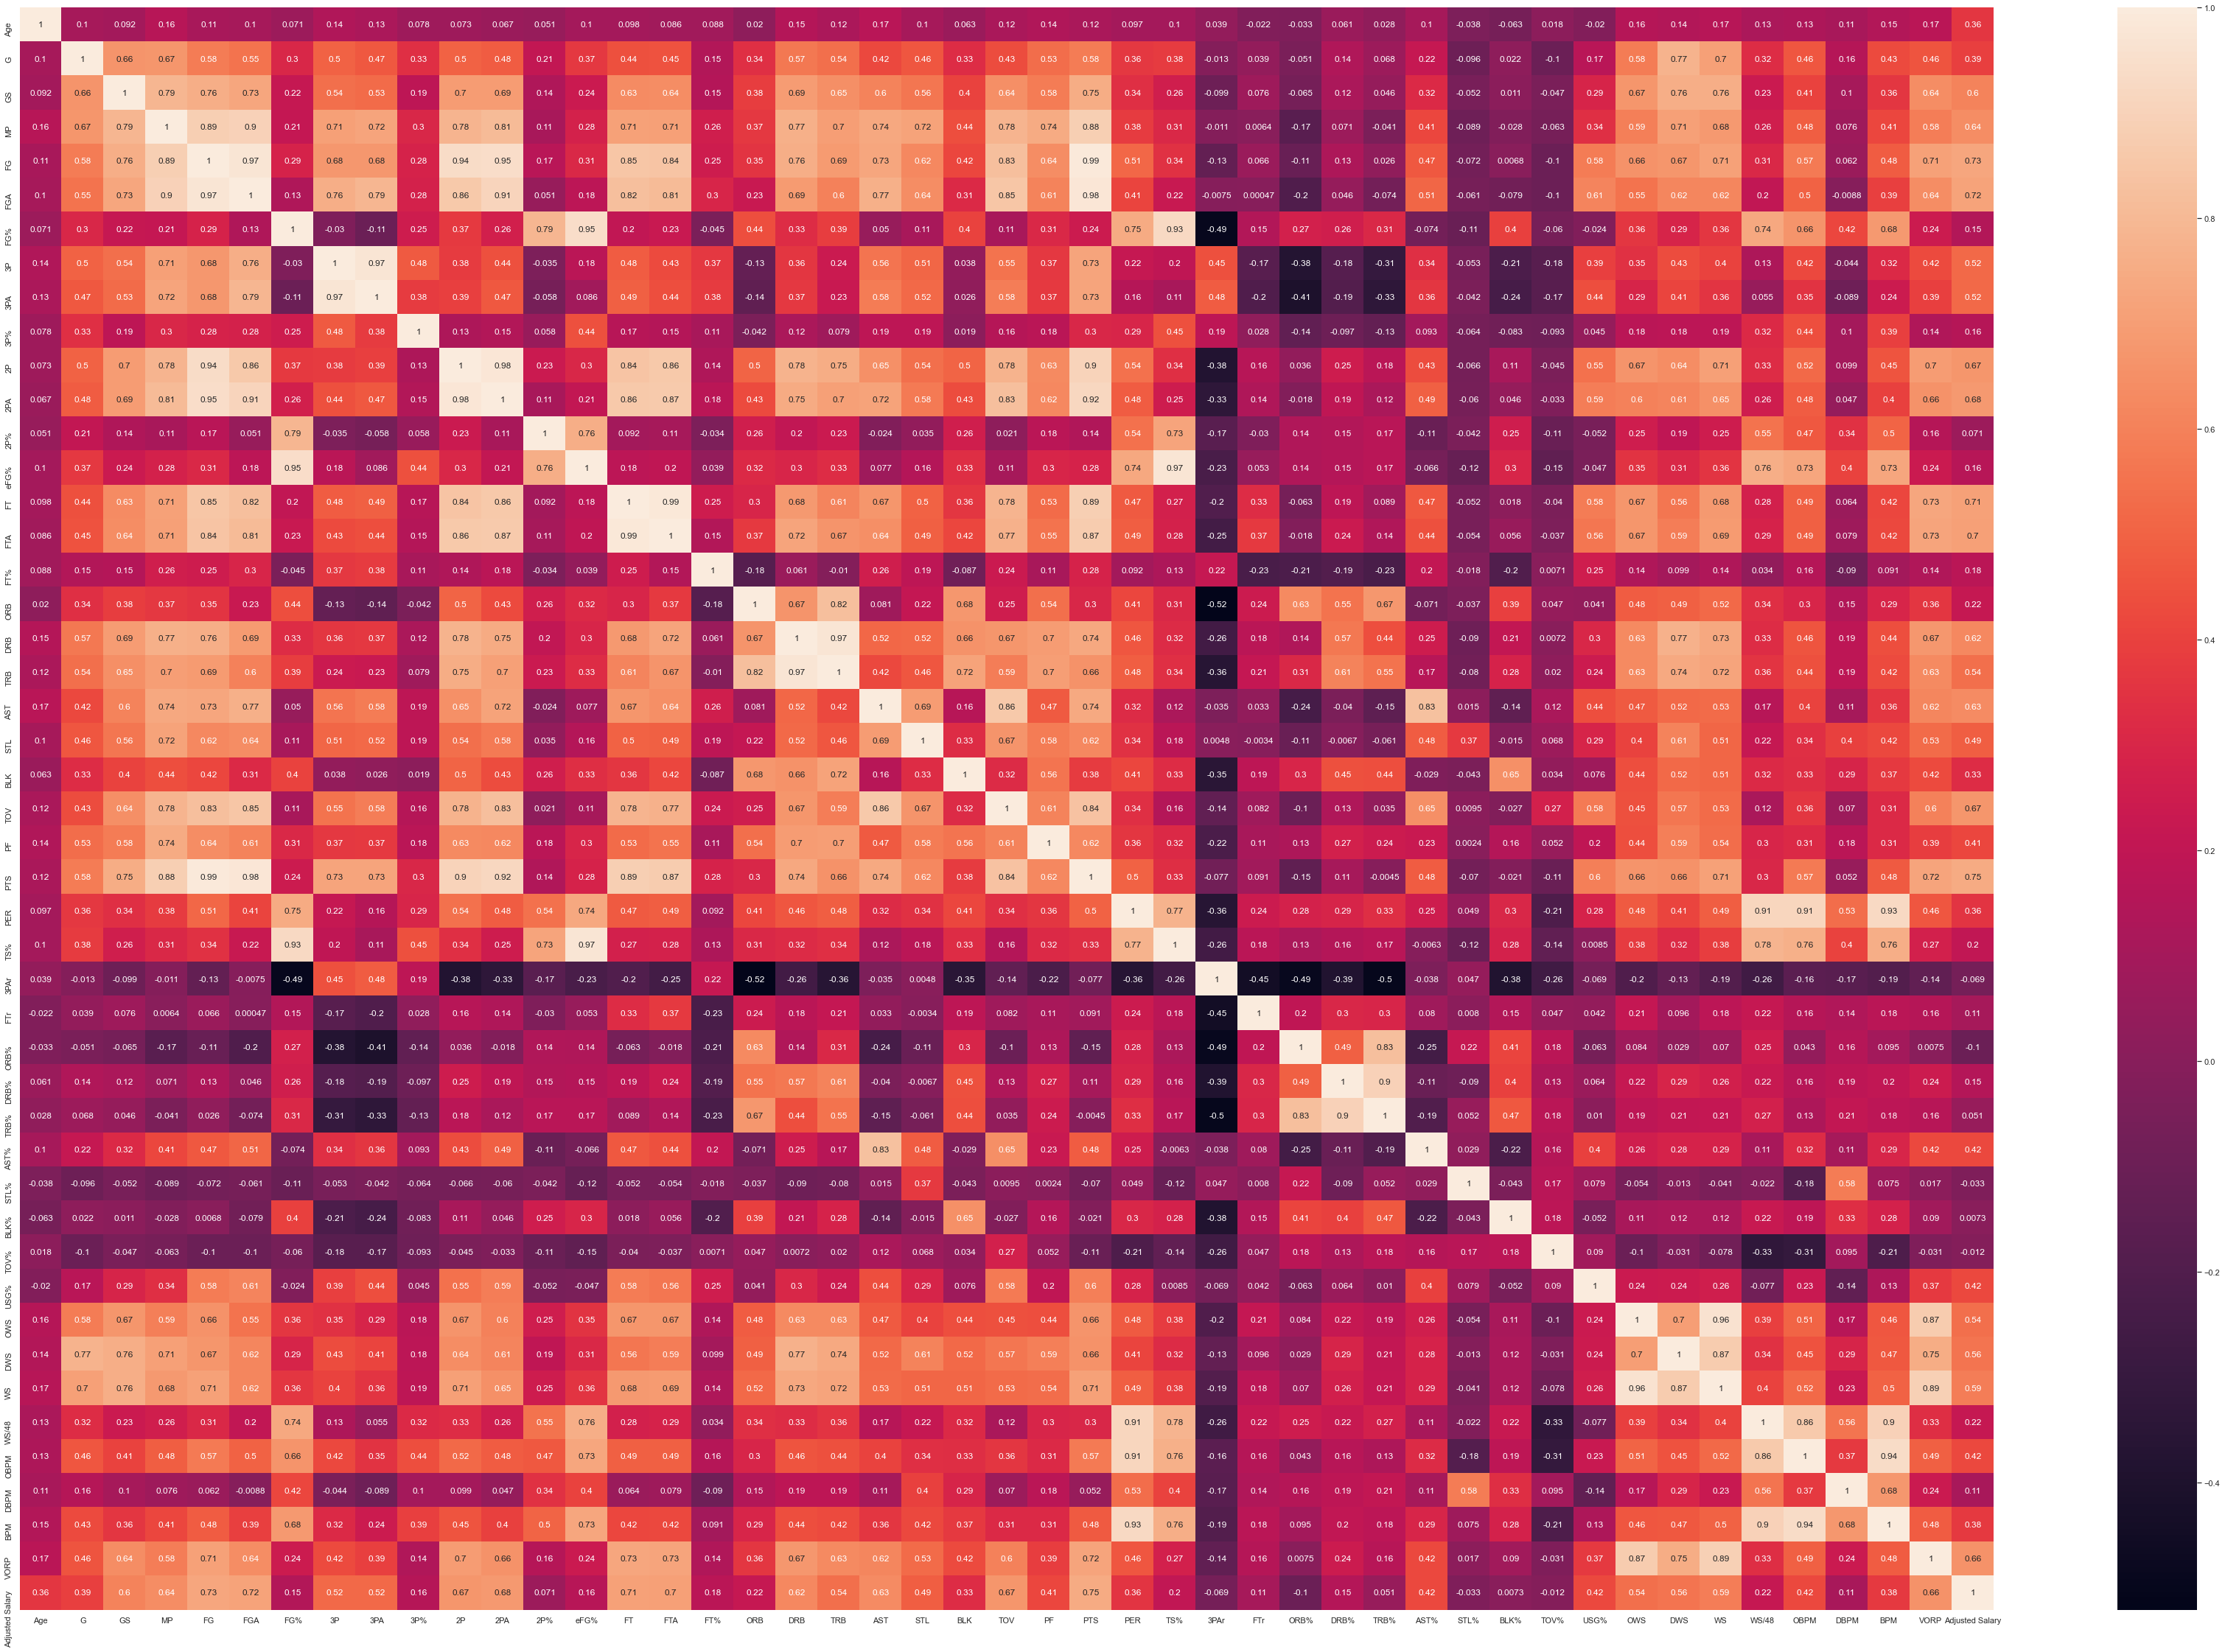

In [2]:
# Show Heatmap of Correlations between data
sns.set(rc={"figure.figsize":(60, 40)})
sns.heatmap(final_data.corr(), annot=True)
sns.set(rc={"figure.figsize":(12, 8)})

# Set up correlations table
correlations = final_data.corr().reset_index()[["index", "Adjusted Salary"]]
correlations["Adjusted Salary"] = correlations["Adjusted Salary"].apply(lambda x: abs(x))

# Get list of columns with alsolute correlations >= 0.2
# target_list = list(correlations["index"])
# target_list = list(correlations[correlations["Adjusted Salary"] >= 0.2]["index"])

In [3]:
# target_list = ['Age', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER']
target_list = list(correlations[(correlations["Adjusted Salary"] >= 0.3)]["index"][:-1])
print(target_list)

['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'AST%', 'USG%', 'OWS', 'DWS', 'WS', 'OBPM', 'BPM', 'VORP']


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data[target_list], final_data["Adjusted Salary"], test_size=0.3, random_state=50)

# Model Selection
## Linear Regression

C:\Users\jpnor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R2 Score Train:  0.6860511008878805
R2 Score Test:  0.7361414646882352
MAE: 3525125.977043883
MSE: 24496136175977.445
RMSE: 4949357.147749336


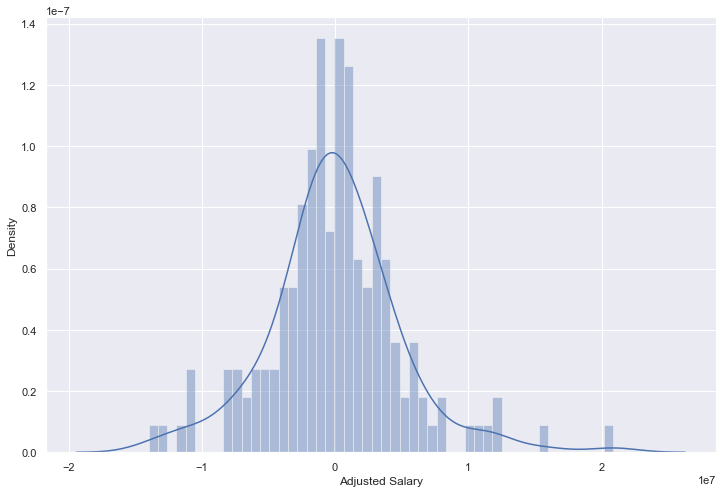

In [5]:
# Set up model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

# Predict values and graph residuals
predictions = lm.predict(X_test)
sns.distplot((y_test-predictions),bins=50)

# Show metrics
from sklearn import metrics
print('R2 Score Train: ', lm.score(X_train, y_train))
print('R2 Score Test: ', lm.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Ensemble Regressors

C:\Users\jpnor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R2 Score Train:  0.8617337999053984
R2 Score Test:  0.7478679728447244
MAE: 3766759.539132825
MSE: 23407468946279.297
RMSE: 4838126.594693373


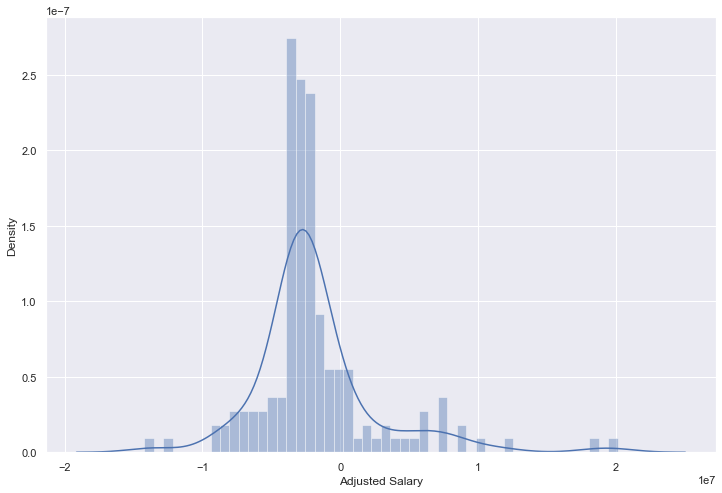

In [6]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
# Set up model
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=30, n_estimators=300, loss='square')
ada.fit(X_train, y_train)

# Predict values and graph residuals
predictions = ada.predict(X_test)
sns.distplot((y_test-predictions),bins=50)

# Show metrics
print('R2 Score Train: ', ada.score(X_train, y_train))
print('R2 Score Test: ', ada.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Gradient Boosting

C:\Users\jpnor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R2 Score Train:  0.9728795578606626
R2 Score Test:  0.8071608013143806
MAE: 2629716.0119484095
MSE: 17902832915705.496
RMSE: 4231173.940610985


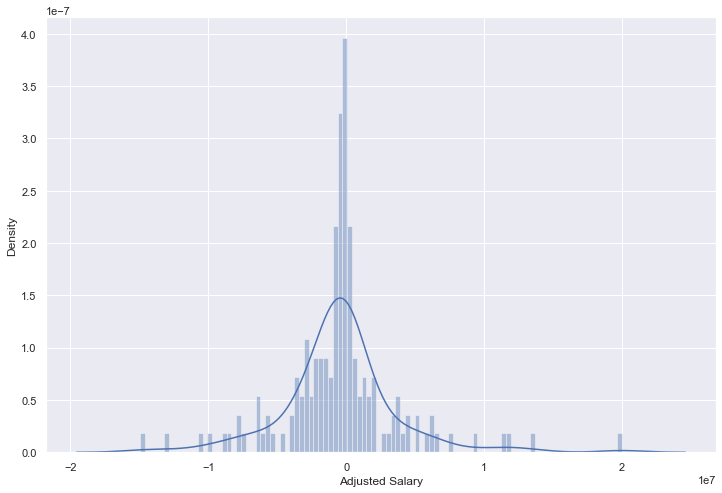

In [7]:
# Set up model
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(random_state=0)
grad.fit(X_train, y_train)

# Predict values and graph residuals
predictions = grad.predict(X_test)
sns.distplot((y_test-predictions),bins=100)

# Show metrics
print('R2 Score Train: ', grad.score(X_train, y_train))
print('R2 Score Test: ', grad.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Random Forest Regressor

C:\Users\jpnor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R2 Score Train:  0.9562039768239251
R2 Score Test:  0.8361156589378969
MAE: 2461882.127687935
MSE: 15214717731318.402
RMSE: 3900604.790454732


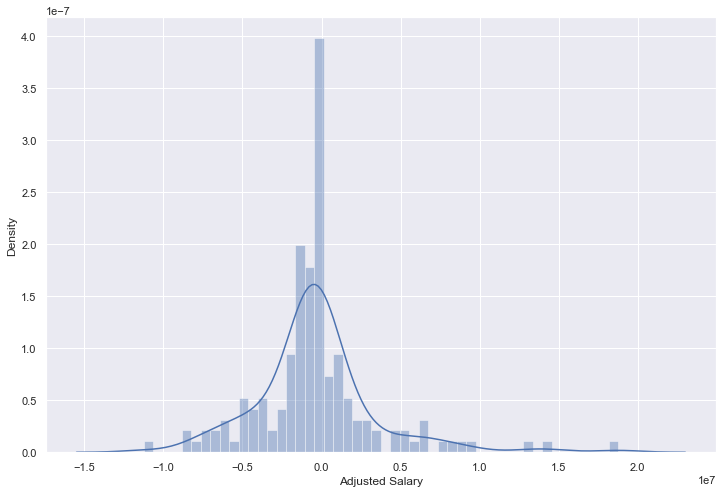

In [23]:
# Set up model
from sklearn.ensemble import RandomForestRegressor
decision = RandomForestRegressor(max_depth= 16, n_estimators= 50, random_state=100) # max_depth= 32, n_estimators= 250
decision.fit(X_train, y_train)

# Predict values and graph residuals
predictions = decision.predict(X_test)
sns.distplot((y_test-predictions),bins=50)

# Show metrics
print('R2 Score Train: ', decision.score(X_train, y_train))
print('R2 Score Test: ', decision.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### Parameter Tuning

In [22]:
parameters = {
    "n_estimators":[5,10,50,100,250,500,1000],
    "max_depth":[2,4,8,16,32,64,128,None]
    
}

rfc = RandomForestRegressor(random_state=100)
from sklearn.model_selection import GridSearchCV

#cv = GridSearchCV(rfc,parameters,cv=7)
#cv.fit(X_train,y_train)
#print(f'Best parameters are: {cv.best_params_}')
# Best parameters are: {'max_depth': 16, 'n_estimators': 50}

Best parameters are: {'max_depth': 16, 'n_estimators': 50}


## XGBoost Regression

C:\Users\jpnor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R2 Score Train:  0.9850277549342004
R2 Score Test:  0.7933191743383956
MAE: 2540056.496904481
MSE: 19187863846769.316
RMSE: 4380395.398450843


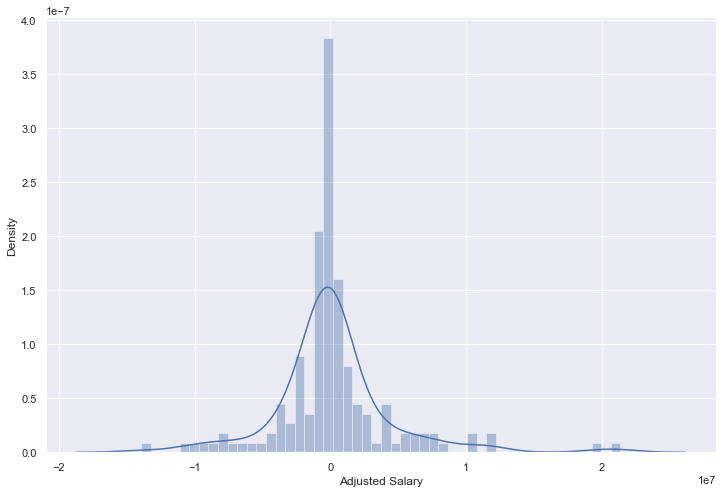

In [21]:
import xgboost as xg
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
predictions = xgb_r.predict(X_test)
sns.distplot((y_test-predictions),bins=50)

# Show metrics
print('R2 Score Train: ', xgb_r.score(X_train, y_train))
print('R2 Score Test: ', xgb_r.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### Parameter Tuning

In [20]:
parameters = {
    "n_estimators":[5,10,50,100,250,500,1000],
    "max_depth":[2,4,8,16,32,64,128,None]
    
}

#rfc = xg.XGBRegressor(seed = 123)
#cv = GridSearchCV(rfc,parameters,cv=7)
#cv.fit(X_train,y_train)
#print(f'Best parameters are: {cv.best_params_}')
# Best parameters are: {'max_depth': None, 'n_estimators': 10}

Best parameters are: {'max_depth': None, 'n_estimators': 10}


## Saving Random Forest Model to Pickle

In [24]:
import pickle
pickle.dump(decision, open("nbasalary_randomforrest1.sav", 'wb'))

In [25]:
test_model = pickle.load(open("nbasalary_randomforrest1.sav", 'rb'))

# Developing tool to query data from basketball reference

In [13]:
import requests
from bs4 import BeautifulSoup

In [14]:
search = "Jaesean tate"

def search_results(Name):
    
    formatted_url = "https://www.basketball-reference.com/search/search.fcgi?search=" + Name.replace(" ","%20")
    page = requests.get(formatted_url)
    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find_all('div', class_="search-item-name")
    results_list = {"Name": [], "Link": []}
    
    # Redirects straight to player page
    if len(results) == 0:
        name = soup.find('div', id="div_faq").find_all('h3')[0].text.split()[2:-1]
        link = soup.find('div', id="bottom_nav_container").find_all('a')[0]
        results_list = {"Name": [" ".join(name)], "Link": ["https://www.basketball-reference.com" + link['href']]}
    else: # Search Page
        for result in results:
            link = result.find('a')
            if link['href'][:8] == "/players":
                results_list['Name'].append(link.text)
                results_list['Link'].append("https://www.basketball-reference.com" + link['href'])
    return results_list

    '''
    if len(results_list['Name']) > 0:
        return results_list
    else:
        # Redirects straight to player page
        name = soup.find('div', id="div_faq").find_all('h3')[0].text.split()[2:-1]
        link = soup.find('div', id="bottom_nav_container").find_all('a')[0]
        results_list = {"Name": [" ".join(name)], "Link": ["https://www.basketball-reference.com" + link['href']]}
        return results_list    
    '''
results_list = search_results(search)
print(results_list)

{'Name': ["Jae'Sean Tate (2021-2023)"], 'Link': ['https://www.basketball-reference.com/players/t/tateja01.html']}


In [38]:
def get_player_data(link, year):
    
    # Read tables from page
    player_data = pd.read_html(link, flavor="html5lib")
    
    # Select data (if there are more than 6 tables, then the player has playoff experience - have to select different tables)
    if len(player_data) >= 6:
        base_data = player_data[0]
        adv_data = player_data[5]
    else:
        base_data = player_data[0]
        adv_data = player_data[3]
    
    # Select Relevant year
    base_data = base_data[base_data['Season'] == year][:1]
    adv_data = adv_data[adv_data['Season'] == year][:1]
    
    #print(adv_data)
    #print(adv_data.columns)
    
    # Filter and merge tables, return final result
    adv_data = adv_data.drop(["Pos", "Age", "Tm", "G", "MP", "Unnamed: 19", "Unnamed: 24"], axis=1)
    final_data = pd.merge(base_data, adv_data, on='Season').fillna(0)[target_list]
    return final_data

bballref_data = get_player_data(results_list['Link'][0], '2020-21')
print(round(test_model.predict(bballref_data).item()))

['2020-21', '2021-22', '2022-23']
8689035


## Get Years

In [47]:
seasons = list(pd.read_html("https://www.basketball-reference.com/players/j/jordami01.html", flavor="html5lib")[0]['Season'])
seasons[:seasons.index('Career')]

['1984-85',
 '1985-86',
 '1986-87',
 '1987-88',
 '1988-89',
 '1989-90',
 '1990-91',
 '1991-92',
 '1992-93',
 '1993-94',
 '1994-95',
 '1995-96',
 '1996-97',
 '1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02',
 '2002-03']

## Find Image

In [36]:
page = requests.get("https://www.basketball-reference.com/players/t/tateja01.html")
image = BeautifulSoup(requests.get("https://www.basketball-reference.com/players/t/tateja01.html").content, 'html.parser').find_all('div', class_="media-item")[0].find('img')
print(image['src'])

https://www.basketball-reference.com/req/202106291/images/players/tateja01.jpg


In [16]:
# Alt version of get_player_data
'''
def get_player_data(link, year):
    player_data = pd.read_html(link)
    
    if len(player_data) == 6:
        base_data = player_data[0]
        adv_data = player_data[4]
    else:
        base_data = player_data[0]
        adv_data = player_data[2]
    
    base_data = base_data[base_data['Season'] == year][:1]
    adv_data = adv_data[adv_data['Season'] == year][:1]
    
    adv_data = adv_data.drop(["Pos", "Age", "Tm", "G", "MP", "Unnamed: 19", "Unnamed: 24"], axis=1)
    final_data = pd.merge(base_data, adv_data, on='Season').fillna(0)[target_list]
    return final_data
'''

'\ndef get_player_data(link, year):\n    player_data = pd.read_html(link)\n    \n    if len(player_data) == 6:\n        base_data = player_data[0]\n        adv_data = player_data[4]\n    else:\n        base_data = player_data[0]\n        adv_data = player_data[2]\n    \n    base_data = base_data[base_data[\'Season\'] == year][:1]\n    adv_data = adv_data[adv_data[\'Season\'] == year][:1]\n    \n    adv_data = adv_data.drop(["Pos", "Age", "Tm", "G", "MP", "Unnamed: 19", "Unnamed: 24"], axis=1)\n    final_data = pd.merge(base_data, adv_data, on=\'Season\').fillna(0)[target_list]\n    return final_data\n'